In [25]:
import numpy as np
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
gender_submission = pd.read_csv("../data/gender_submission.csv")

data = pd.concat([train, test], sort=False)



In [26]:
data['Sex'].replace(["male", "female"], [0,1], inplace=True)
data["Embarked"].fillna(("S"), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

data["Fare"].fillna(np.mean(
    data["Fare"]
), inplace=True)

In [27]:
age_avg = data["Age"].mean()
age_std = data["Age"].std()

np.random.randint(age_avg - age_std, age_avg + age_std)

32

In [28]:
np.random.randint(age_avg - age_std, age_avg + age_std)


30

In [29]:
data["Age"].fillna(data["Age"].median(), inplace=True)

In [30]:
delete_columns = [
    'Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin'
]
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train["Survived"]
X_trian = train.drop("Survived", axis=1)
X_test = test.drop("Survived", axis=1)

In [32]:
X_trian.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [34]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    penalty="l2", solver="sag", random_state=0
)

In [40]:
clf.fit(X_trian, y_train)
y_pred = clf.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
gender_submission = pd.read_csv("../data/gender_submission.csv")

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

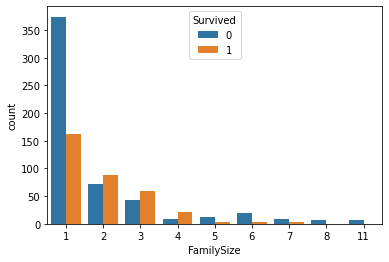

In [47]:
import seaborn as sns

data["FamilySize"] = data["Parch"] + data["SibSp"] + 1
train["FamilySize"] = data["FamilySize"][:len(train)]
test["FamilySize"] = data["FamilySize"][len(train):]
sns.countplot(x="FamilySize", data=train, hue="Survived")

In [49]:
data["IsAlone"] = 0
data.loc[data["FamilySize"] == 1, "IsAlone"] = 1

train["IsAlone"] = data["IsAlone"][:len(train)]
test["IsAlone"] = data["IsAlone"][len(train):]

In [50]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [52]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,2,0
1,1,1,38.0,71.2833,1,2,0
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,2,0
4,3,0,35.0,8.0500,0,1,1


In [53]:
sub = pd.read_csv("../data/gender_submission.csv")

In [54]:
clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)

sub["Survived"] = list(map(int, y_pred_familysize_isalone))
sub.to_csv()

sub.to_csv('submission_familysize_isalone.csv', index=False)

sub.head()

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
